In [1]:
A3 <- read.csv("./Data/audi_A3.csv")

In [2]:
head(A3)
tail(A3)

year,price,transmission,mileage,fuelType,mpg,engineSize
2019,17300,Manual,1998,Petrol,49.6,1.0
2015,10200,Manual,46112,Petrol,60.1,1.4
2017,16100,Manual,28955,Petrol,58.9,1.4
2017,16400,Manual,21695,Petrol,58.9,1.4
2017,14500,Automatic,26156,Petrol,58.9,1.4
2014,13900,Automatic,30516,Petrol,56.5,1.4


,year,price,transmission,mileage,fuelType,mpg,engineSize
1908,2016,16495,Semi-Auto,46600,Diesel,57.6,2.0
1909,2016,14995,Manual,39750,Petrol,57.6,1.4
1910,2013,12695,Manual,31500,Petrol,53.3,1.4
1911,2020,16999,Manual,4018,Petrol,49.6,1.0
1912,2020,16999,Manual,1978,Petrol,49.6,1.0
1913,2020,17199,Manual,609,Petrol,49.6,1.0


In [20]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



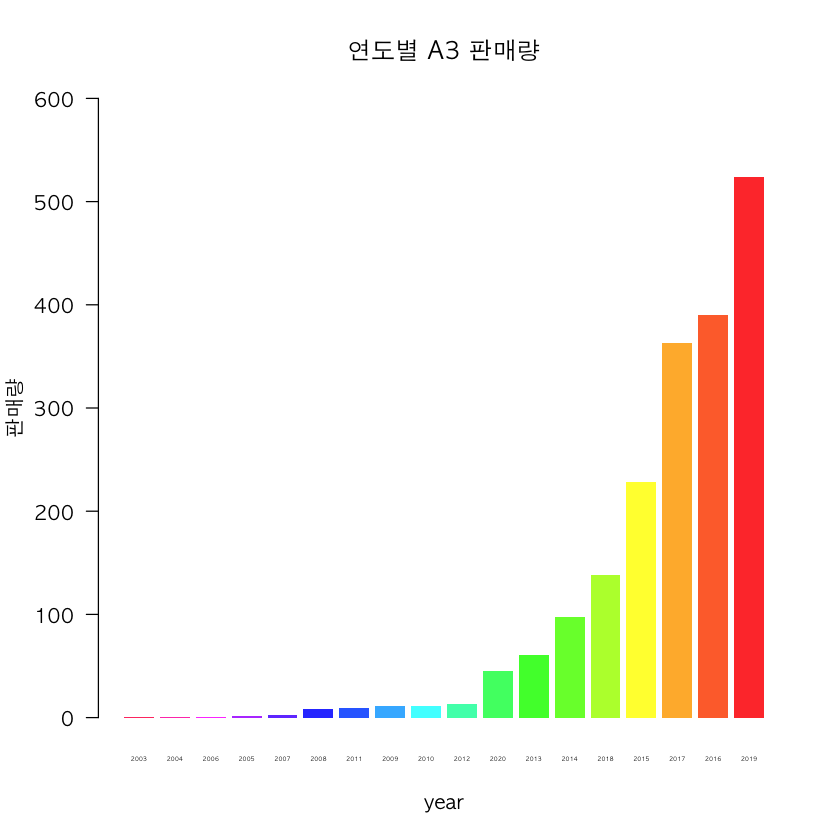

In [39]:
# 연도별 A3 판매량

par(family = 'AppleGothic')
options(warn = -1)

barplot(sort(table(A3$year)),
        main = '연도별 A3 판매량',
        cex.names = 0.3,
        ylim = c(0,600),
        col = rev(rainbow(count(as.data.frame(unique(A3$year))), alpha = 0.85)),
        # horiz = T,
        las = 1,
        border = F,
        xlab = "year",
        ylab = "판매량"
       )

In [4]:
table(A3$transmission)


Automatic    Manual Semi-Auto 
      295      1088       530 

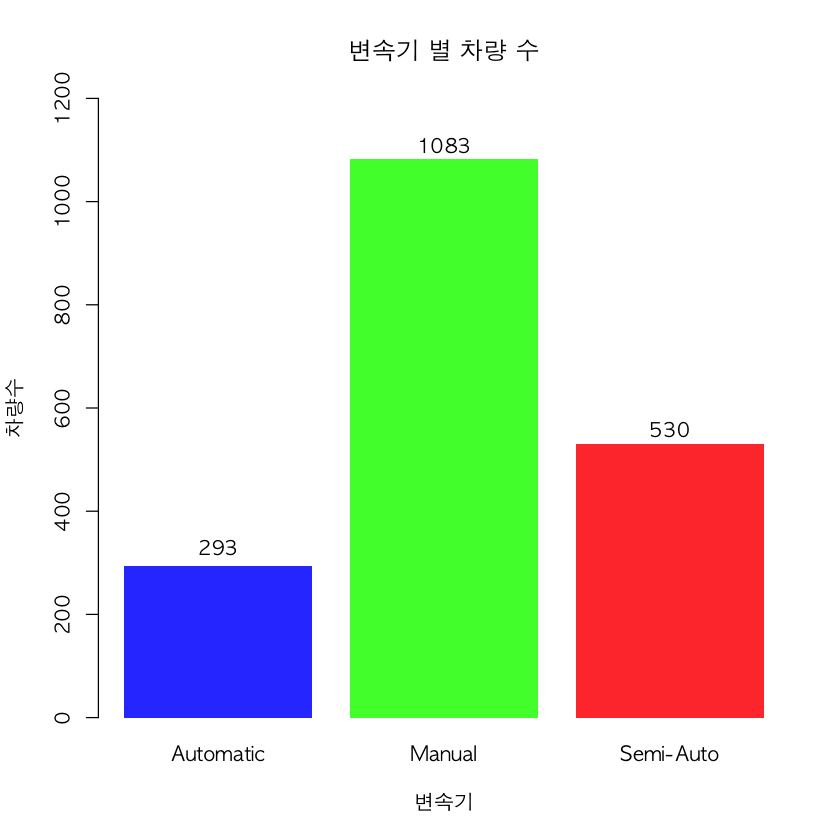

In [57]:
# transmission(변속기) 별 차량 수

par(family = 'AppleGothic')
options(warn = -1)

tmBP <- barplot(table(A3$transmission),
        main = "변속기 별 차량 수",
        xlab = "변속기",
        ylab = "차량수",
        ylim = c(0,1200),
        col = rev(rainbow(count(as.data.frame(unique(A3$transmission))), alpha = 0.85)),
        border = F
       )
text(x=tmBP[1],330,table(A3$transmission)[1])
text(x=tmBP[2],1110,table(A3$transmission)[2])
text(x=tmBP[3],560,table(A3$transmission)[3])

In [6]:
library(plotrix)

In [66]:
table(A3$engineSize)


  1 1.2 1.4 1.5 1.6 1.8 1.9   2 2.5 
101  19 344 299 479  29   4 628   3 

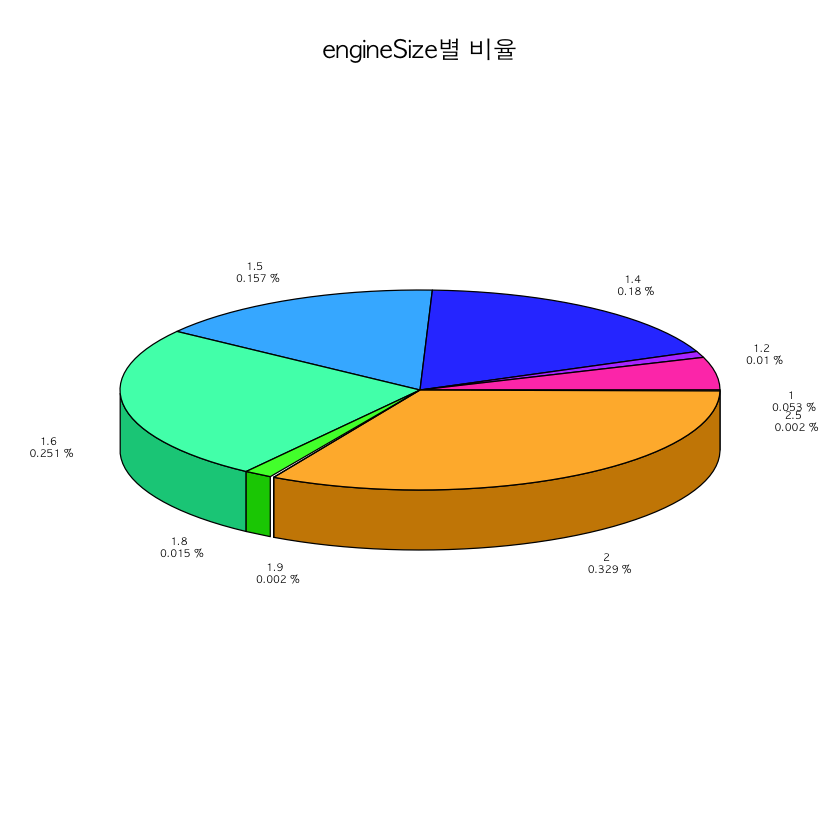

In [84]:
# engineSize 비율보기

par(family = 'AppleGothic')
options(warn = -1)

ratio_eS <- table(A3$engineSize)/sum(table(A3$engineSize))
name <- c(1,1.2,1.4,1.5,1.6,1.8,1.9,2,2.5)

pie3D(ratio_eS,
      main = "engineSize별 비율",
      labels = paste(name,"\n",round(ratio_eS,3),"%"),
      labelcex = 0.5,
      col = rev(rainbow(count(as.data.frame(unique(A3$engineSize))), alpha = 0.85))
     )

In [10]:
A3 <- subset(A3,!engineSize==0)

In [12]:
str(A3)

'data.frame':	1906 obs. of  7 variables:
 $ year        : int  2019 2015 2017 2017 2017 2014 2017 2015 2019 2015 ...
 $ price       : int  17300 10200 16100 16400 14500 13900 17100 11300 15700 15000 ...
 $ transmission: Factor w/ 3 levels "Automatic","Manual",..: 2 2 2 2 1 1 2 2 2 1 ...
 $ mileage     : int  1998 46112 28955 21695 26156 30516 29545 75619 2029 56291 ...
 $ fuelType    : Factor w/ 2 levels "Diesel","Petrol": 2 2 2 2 2 2 1 1 2 2 ...
 $ mpg         : num  49.6 60.1 58.9 58.9 58.9 56.5 65.7 68.9 49.6 42.8 ...
 $ engineSize  : num  1 1.4 1.4 1.4 1.4 1.4 2 2 1 1.8 ...


In [109]:
table(A3$year)


2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 
   1    1    2    1    3    8   11   11    9   13   61   97  228  390  363  138 
2019 2020 
 524   45 

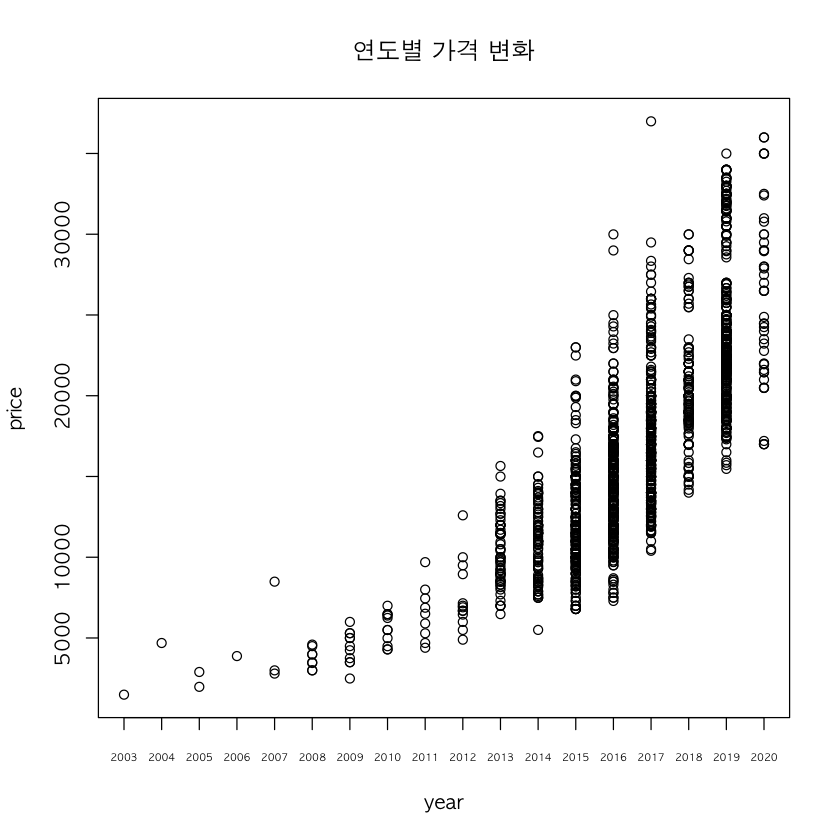

In [133]:
# 연도별 가격 변화

par(family = 'AppleGothic')
options(warn = -1)

plot(A3$year,A3$price,
     main = "연도별 가격 변화",
     xlab = "year",
     ylab = "price",
     xlim = c(2003,2020),
     xaxt = "n",
    )
xat = seq(2003,2020,by=1)
axis(side=1,at=xat,cex.axis=0.5)

In [190]:
test <- aggregate(mileage~transmission,A3,mean)
test_m <- test[,2]
test

transmission,mileage
Automatic,21702.39
Manual,34716.02
Semi-Auto,20395.26


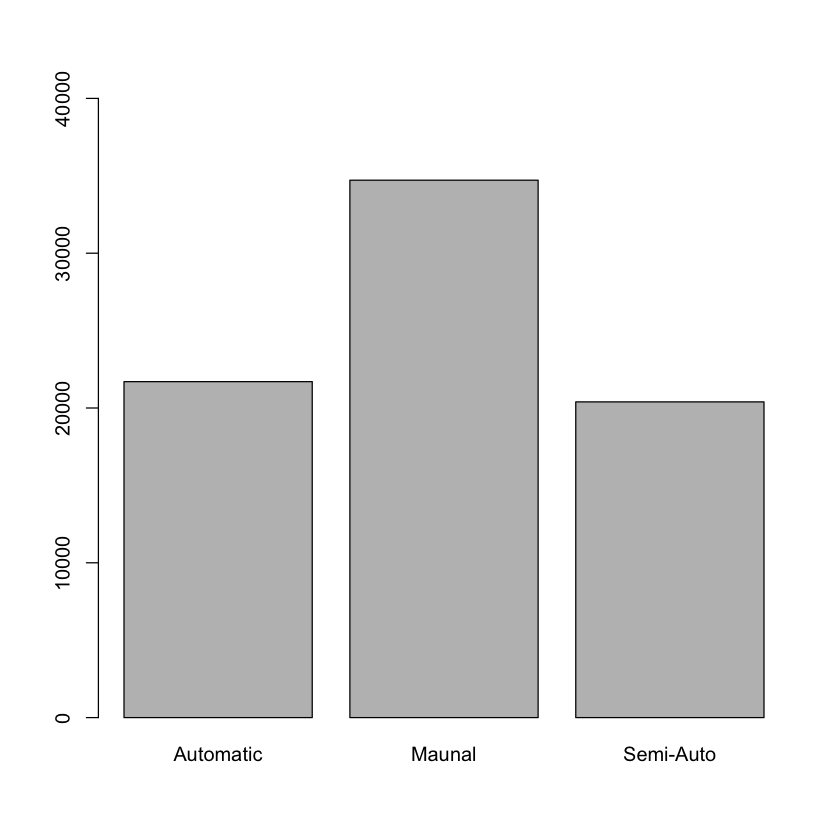

In [195]:
# 변속기 별 주행거리 평균

barplot(test_m,
        names = c('Automatic','Maunal','Semi-Auto'),
        ylim = c(0,40000)
       )

In [204]:
table(A3$engineSize)


  1 1.2 1.4 1.5 1.6 1.8 1.9   2 2.5 
101  19 344 299 479  29   4 628   3 

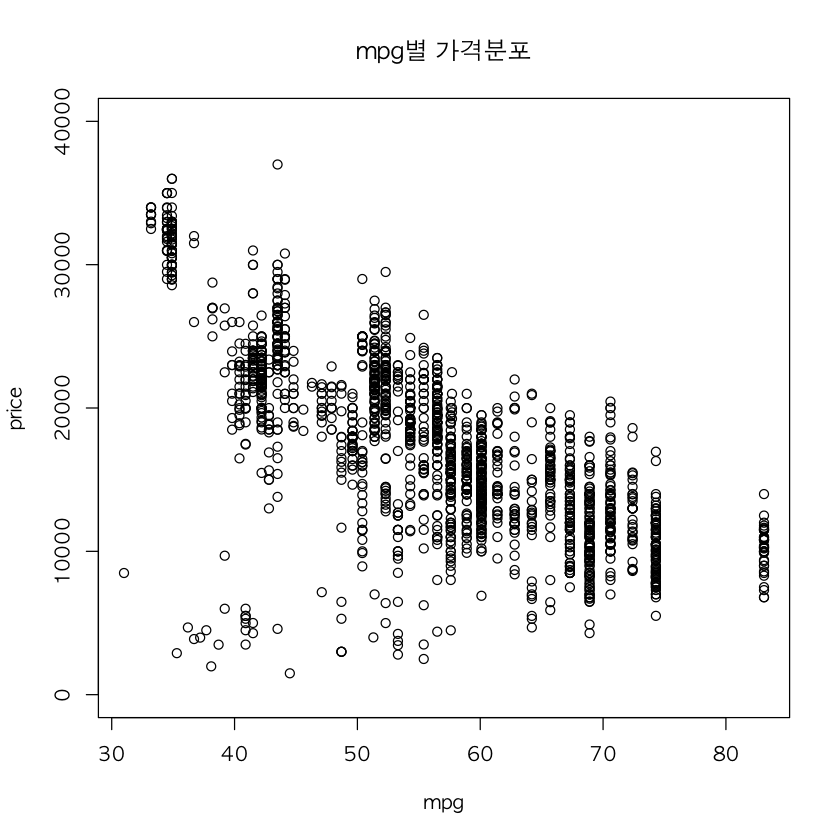

In [219]:
# mpg별 가격분포

par(family = 'AppleGothic')
options(warn = -1)

plot(A3$mpg,A3$price,
     main = "mpg별 가격분포",
     xlab = "mpg",
     ylab = "price",
     ylim = c(0,40000)
    )

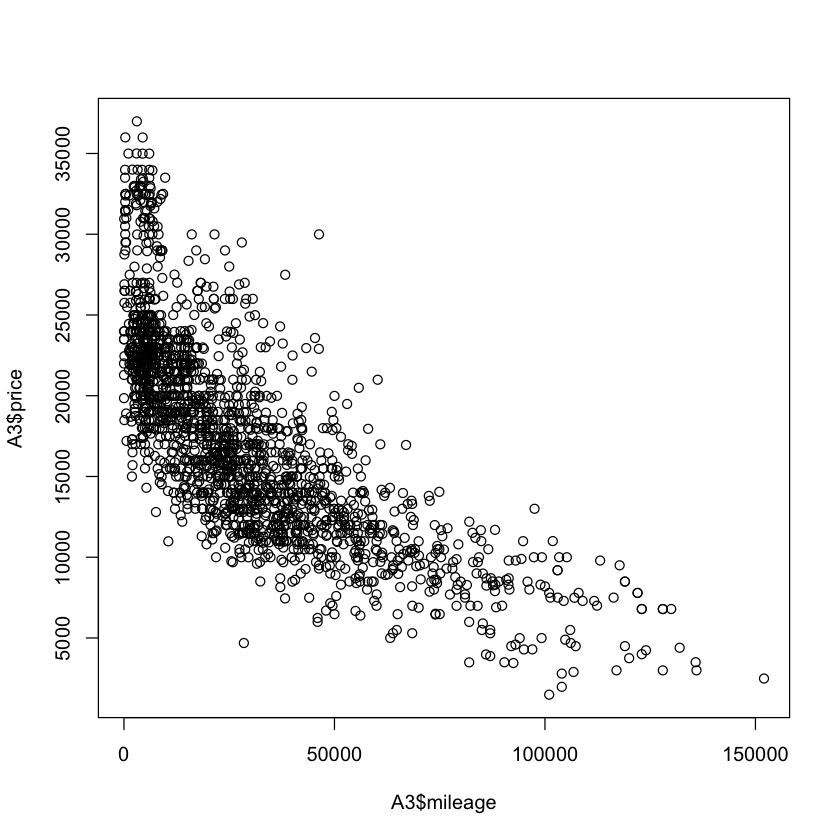

In [220]:
plot(A3$mileage,A3$price)

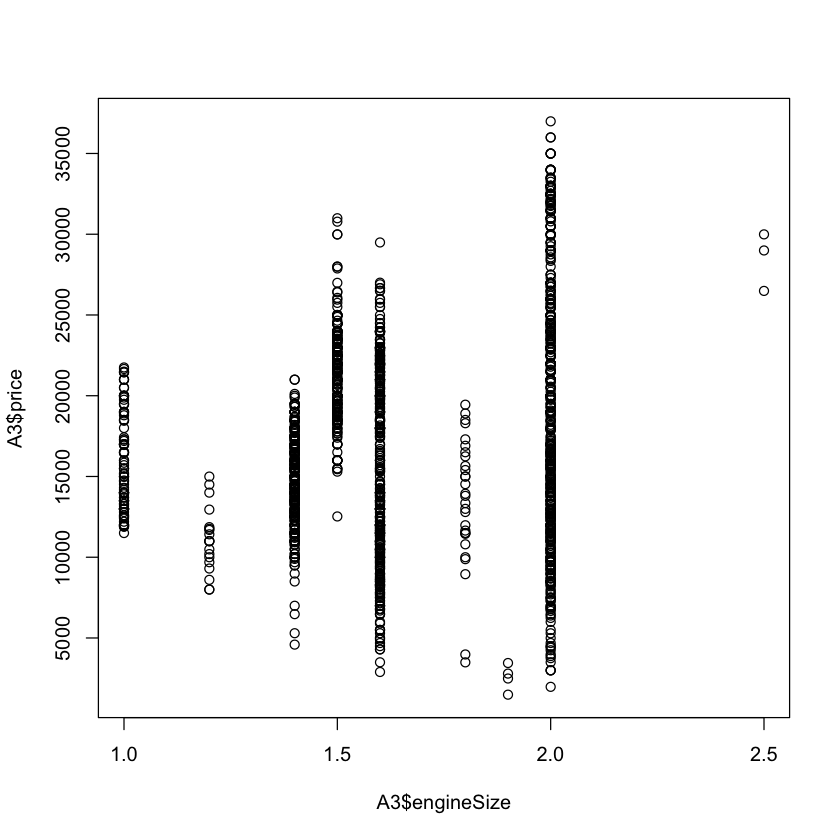

In [221]:
plot(A3$engineSize,A3$price)